In [33]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from sklearn.linear_model import LinearRegression
import csv

usedir = 'C:\\Users\\tup54227\\Documents\\GitHub\\istart-sharedreward\\derivatives'
os.chdir(usedir)

df = pd.read_excel("ppi_wholebrain_scatterplot.xls")

fig=sns.lmplot(y="act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13",x="RS", data=df, order=2)

SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

In [34]:
ASRD = pd.read_csv('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward/Behavioral_Analysis/Data_Out/AllSharedRewardData.csv')
APD = pd.read_excel('ISTART-ALL-Combined-042122.xlsx')
keepios = [col for col in APD.columns if col.startswith('ios') or col.startswith('sub')]
keepwinlose = [col for col in ASRD.columns if col.startswith('Win') or col.startswith('Lose') or col.startswith('sub')]
df = pd.merge(APD[keepios], df, on = 'sub', how = 'right')
df = pd.merge(ASRD[keepwinlose], df, on='sub', how='right')
df = df.drop_duplicates(subset=['Subject']).dropna(subset=['Subject'])

df = df.replace(999, np.NaN)
df['ios_diff_computer'] = df['ios_p'] - df['ios_computer'] #ios_p was participant rating of frend, ios_fu was participant rating of stranger in follow-up. ios_f was FRIEND rating of participant
df['ios_diff_stranger'] = df['ios_p'] - df['ios_fu_score']
df['Win_F_C'] = df['Win-Friend'] - df['Win-Comp']
df['Win_F_S'] = df['Win-Friend'] - df['Win-Stranger']
df_ios = df.dropna(subset=['ios_diff_computer'])
df_psr = df.dropna(subset = ['Win_F_S'])
df_both = df_psr.dropna(subset=['ios_diff_computer'])

pd.set_option('display.max_columns', None)
len(df)

45

In [35]:
len(df_ios)

28

In [36]:
df['aTPJ_R_P_F_C'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_02'] - df['aTPJ_VS_ppi_cope_01'])
df['aTPJ_R_P_F_S'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_06'] - df['aTPJ_VS_ppi_cope_05'])
df['pTPJ_R_P_F_C'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_02'] - df['pTPJ_VS_ppi_cope_01'])
df['pTPJ_R_P_F_S'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_06'] - df['pTPJ_VS_ppi_cope_05'])
df

,sub,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_fu_score,ios_computer,ios_f,ios_p,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-23,Unnamed: 18,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 26,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,VS_seed_F_S,VS_seed_F_C,win_C,win_F,win_S,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S,aTPJ_R_P_F_C,aTPJ_R_P_F_S,pTPJ_R_P_F_C,pTPJ_R_P_F_S
0,1001,5.0,-2.0,5.0,5.0,0.0,4.0,1.0,1.0,5,5,1001,1,0.479686,-0.622222,-7.936790,-0.637264,2.960326,-0.568018,-0.344076,0.257997,0.375157,0.375157,-0.023776,0.055897,0.043499,0.078306,0.070878,-0.255516,NaN,-8.897129,13.637379,41.681642,42.253260,65.702165,7.122439,7.023092,NaN,-0.124334,-0.129312,-0.011946,-0.156321,-0.057591,-0.019649,-0.015173,-0.410006,-0.080410,-0.212520,-0.012790,-0.204635,40.346370,33.107248,-2.310050,30.797198,-9.549172,4.0,4.0,0.0,7.0,-0.139397,-0.182317,0.262723,0.059736
1,1006,3.0,2.0,5.0,-4.0,-1.0,-2.0,2.0,2.0,4,5,1006,1,-1.131845,-0.622222,-7.936790,0.365466,2.336405,1.028158,-0.873651,0.297450,0.203178,0.203178,0.148530,-0.553190,0.048455,0.253124,0.390924,0.072858,NaN,30.251268,23.831967,16.998754,-7.474041,-0.526911,5.429469,17.678105,NaN,-0.027773,0.109658,-0.031841,-0.067696,-0.015802,-0.001288,0.100421,0.061524,-0.062508,0.130512,0.014450,0.094393,10.379573,18.905669,-7.936080,10.969588,0.590015,3.0,3.0,-2.0,1.0,-0.173286,-0.050369,0.231917,0.113078
3,1009,5.0,4.0,4.0,-5.0,-4.0,-4.0,2.0,1.0,5,6,1009,1,-1.131845,0.377778,-8.181235,-0.766379,2.613079,1.370494,-0.301386,0.042417,0.182616,0.182616,0.239714,-0.081801,0.050043,0.040188,0.026646,0.490375,NaN,6.595074,-9.533180,15.810334,-17.603033,-29.907103,-9.650790,16.099039,NaN,-0.104572,0.070416,0.049526,0.185446,0.097494,0.207775,-0.199587,0.108495,-0.064522,-0.003135,-0.154966,0.083374,38.766866,58.052598,-27.829507,30.223091,-8.543776,5.0,4.0,1.0,1.0,-0.039068,0.025640,-0.246696,-0.176953
4,1010,1.0,-2.0,-5.0,2.0,-3.0,-5.0,NaN,NaN,6,6,1010,1,3.190376,-1.622222,-5.692346,-5.514293,11.170422,-0.991437,0.558449,-0.320931,-0.771705,-0.771705,0.365152,0.310482,0.266391,0.314331,0.787606,0.549525,NaN,17.901311,5.852669,-0.372075,55.805235,50.540134,6.244366,38.020551,NaN,-0.013869,-0.257590,-0.403182,-0.025067,-0.155147,-0.350274,-0.120598,-0.173152,-0.481878,0.118195,-0.100709,-0.396719,36.984804,21.223241,5.707777,26.931018,-10.053786,NaN,NaN,6.0,3.0,0.621836,0.573241,0.652627,0.896084
5,1011,5.0,5.0,2.0,-5.0,-5.0,-5.0,NaN,NaN,7,5,1011,1,-1.416233,2.377778,-2.670123,-3.706279,-5.232523,-1.678332,1.498732,0.145049,0.365831,0.365831,0.092184,0.100279,0.175593,0.219936,0.189737,0.867485,NaN,2.925382,-3.930550,-49.534258,-28.170113,-91.601465,-36.733455,-4.753485,NaN,0.108296,0.070321,-0.022086,0.151899,-0.113821,-0.087979,0.013179,0.109955,-0.047087,0.126304,-0.153662,-0.136274,-75.332588,-22.950430,42.914065,19.963635,95.296223,NaN,NaN,3.0,0.0,0.211960,0.1481

,sub,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_fu_score,ios_computer,ios_f,ios_p,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-23,Unnamed: 18,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 26,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,VS_seed_F_S,VS_seed_F_C,win_C,win_F,win_S,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S,aTPJ_R_P_F_C,aTPJ_R_P_F_S,pTPJ_R_P_F_C,pTPJ_R_P_F_S
sub,1.000000,0.210677,0.018209,-0.064223,-0.258335,-0.112806,0.029783,0.295178,0.516673,-0.110746,0.226164,1.000000,NaN,0.028663,-0.009318,0.022582,0.020976,-0.225917,-0.160756,0.080632,-0.236236,-0.212544,-0.212544,-0.325313,0.365077,-0.005647,-0.224732,-0.245388,0.092913,NaN,-0.037861,-0.004040,-0.002356,-0.076834,0.043411,-0.003552,0.043058,NaN,0.132645,-0.071749,0.062387,0.032203,0.143899,0.196531,0.008458,0.033152,0.084381,0.081624,0.063589,0.208922,0.001424,0.002245,-0.053829,-0.089022,-0.074603,-0.240417,-0.057178,0.186296,0.140259,0.084518,-0.062628,-0.022210,-0.099211
Win-Friend,0.210677,1.000000,0.370690,0.184113,-0.357843,-0.188540,-0.104751,0.115235,0.165314,0.133584,0.259066,0.210677,NaN,0.015867,0.197580,0.205017,0.040419,0.029235,-0.014366,0.129401,-0.131592,-0.024713,-0.024713,-0.174288,0.037188,0.100681,0.029236,-0.056719,0.058614,NaN,-0.082075,-0.167179,-0.011502,-0.171501,-0.137950,0.121974,-0.062409,NaN,-0.124366,0.007592,-0.136202,0.013607,-0.016953,-0.032629,-0.123637,-0.148848,0.121806,0.012328,-0.082896,0.042277,-0.200918,-0.108250,0.072836,-0.069059,0.164088,0.129356,0.157184,0.436776,0.383034,0.025315,0.113704,-0.043505,-0.131407
Win-Stranger,0.018209,0.370690,1.000000,0.366279,-0.236899,-0.331007,-0.212895,0.234587,0.199954,0.402362,0.364223,0.018209,NaN,-0.010748,-0.016938,0.018112,0.138779,0.108173,0.074172,0.210317,-0.061106,0.004363,0.004363,-0.378708,0.063813,0.116763,-0.235664,-0.236727,-0.019810,NaN,-0.161626,-0.111680,-0.191375,-0.337429,-0.470229,0.088940,-0.017393,NaN,-0.268776,-0.026257,-0.003325,-0.031943,-0.045264,-0.137644,-0.260942,0.117044,0.094549,0.058810,-0.008100,-0.045792,-0.061830,-0.287207,0.416337,0.191455,0.231561,0.224883,0.190189,-0.110853,-0.715937,-0.136390,0.040370,-0.238356,-0.006432
Win-Comp,-0.064223,0.184113,0.366279,1.000000,0.024020,-0.005297,0.153833,-0.186360,0.092754,0.080367,0.119255,-0.064223,NaN,0.084644,-0.195406,-0.184842,0.176384,-0.074569,-0.045481,0.073188,-0.049712,-0.032056,-0.032056,-0.233297,0.223790,-0.042476,-0.177221,-0.203844,0.048338,NaN,-0.124031,0.045744,0.118222,-0.090032,-0.063780,0.306640,0.111934,NaN,-0.115131,-0.014502,-0.020480,-0.090561,0.146790,0.130586,-0.216471,-0.227141,-0.109525,-0.263111,0.016322,-0.160294,-0.029862,-0.252334,0.255513,-0.016993,0.018660,0.031623,0.217349,-0.803776,-0.225897,-0.084433,-0.038467,-0.042803,0.036497
Lose-Friend,-0.258335,-0.357843,-0.236899,0.024020,1.000000,0.277258,0.345351,-0.267746,-0.326088,0.003879,-0.20709

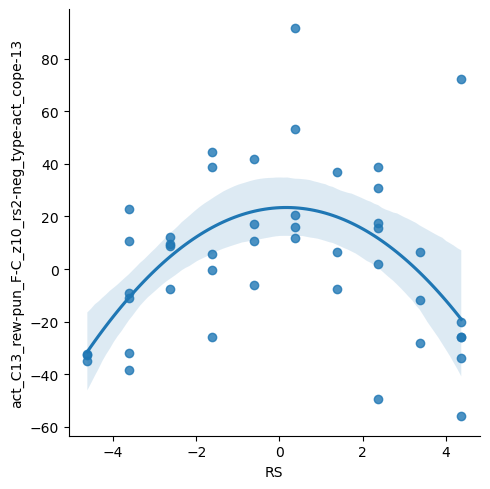

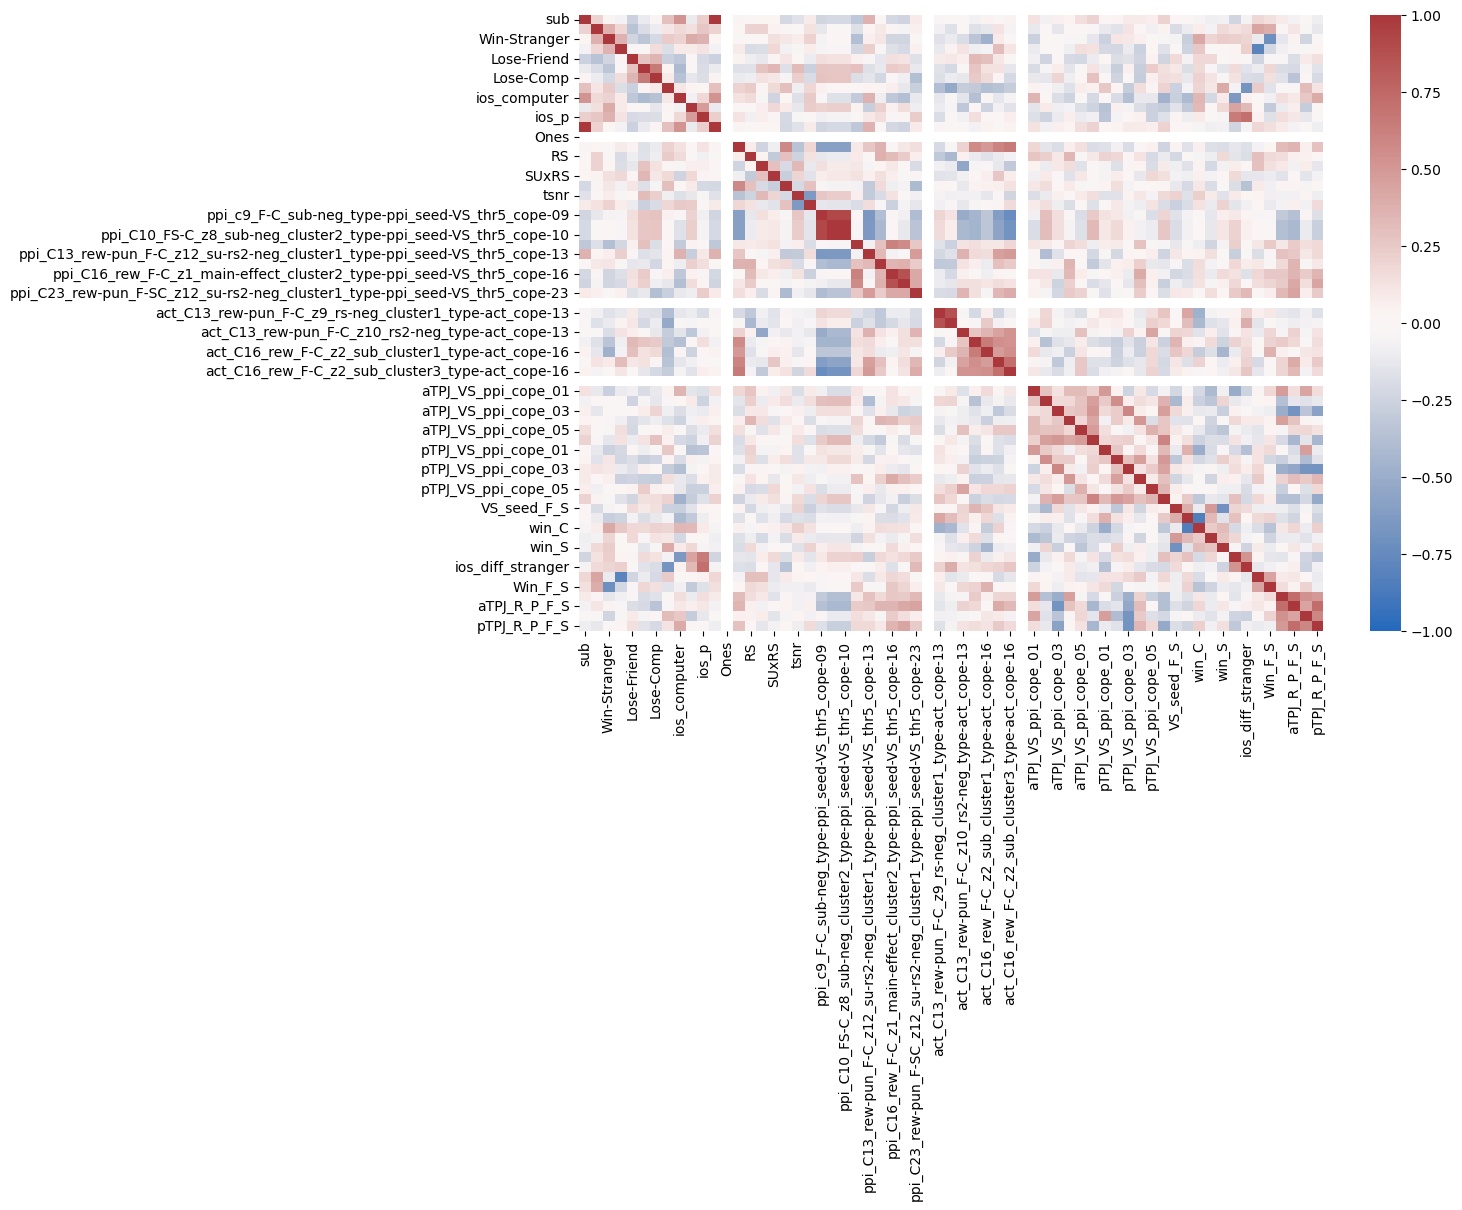

45

In [37]:
df 

cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sns.heatmap(cormat,cmap='vlag',vmin=-1)
plt.show()

len(df['pTPJ_R_P_F_S'].unique())

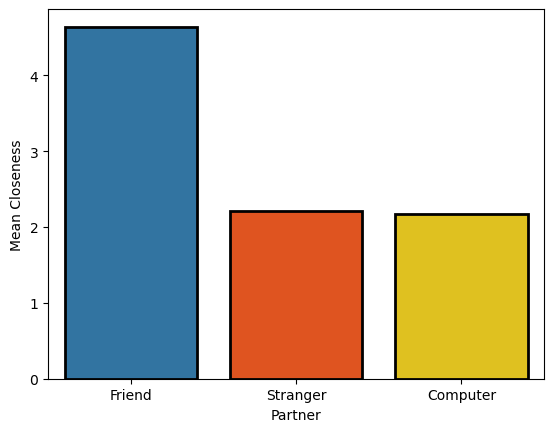

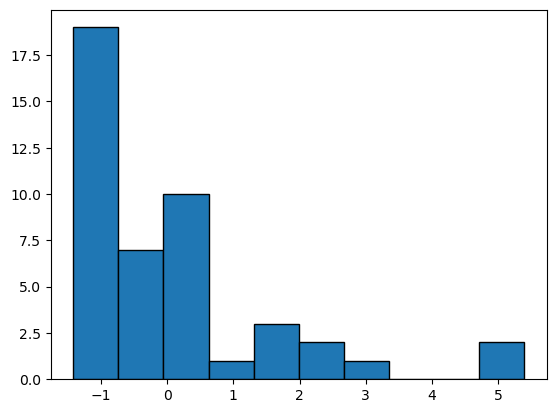

		   Individual Differences - Substance Use



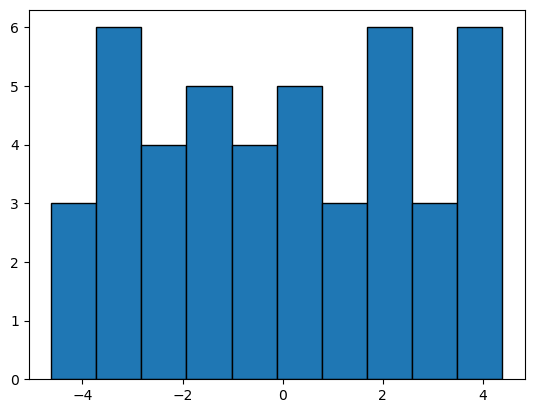

		   Individual Differences - Reward Sensitivity



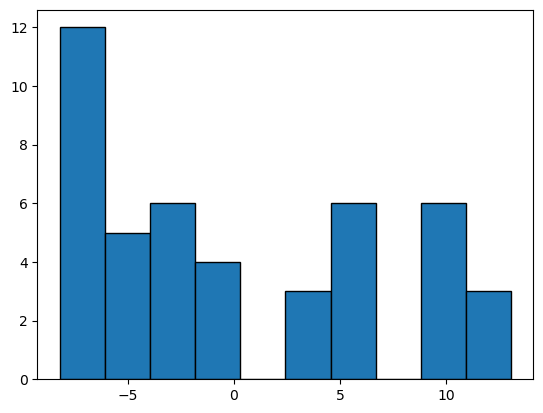

		   Individual Differences - Reward Sensitivity Squared



In [38]:
ios_means = pd.DataFrame({
    'Partner': ['Friend', 'Stranger', 'Computer'],
    'Mean Closeness': [df_ios['ios_p'].mean(),df_ios['ios_fu_score'].mean(),df_ios['ios_computer'].mean()]})
fig_closeness = sns.barplot(x = 'Partner', y = 'Mean Closeness', data=ios_means, palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth=2)
plt.savefig('Figures/mean_closeness.svg')
plt.show()

plt.hist(df['SU'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Substance Use\n')

plt.hist(df['RS'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Reward Sensitivity\n')

plt.hist(df['RS_square'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Reward Sensitivity Squared\n')

Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.3746133442589799 ; p: 0.01123390641902428


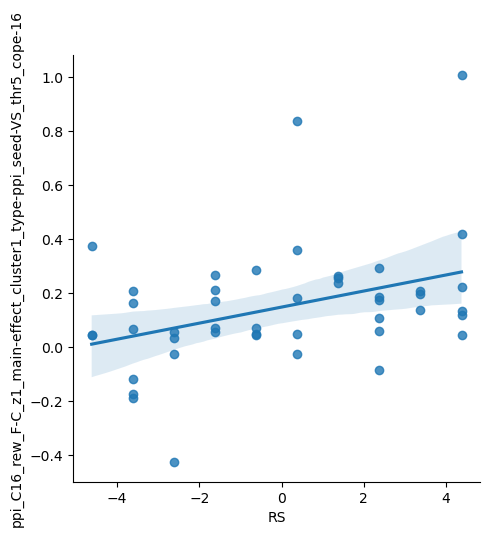

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.3594765837245274 ; p: 0.015297112260920136


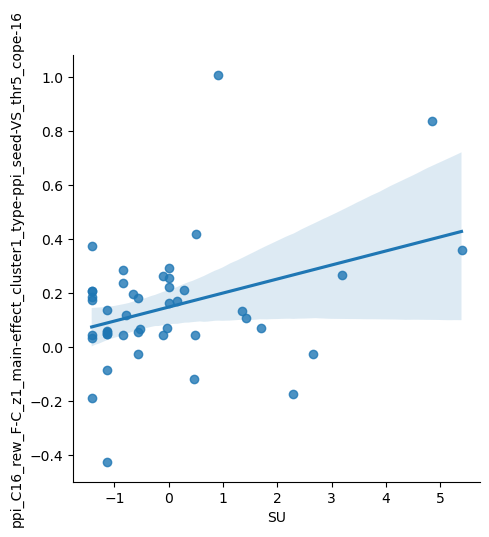

<class 'seaborn.axisgrid.FacetGrid'>
RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.13618626962191308 ; p: 0.3723804261097893


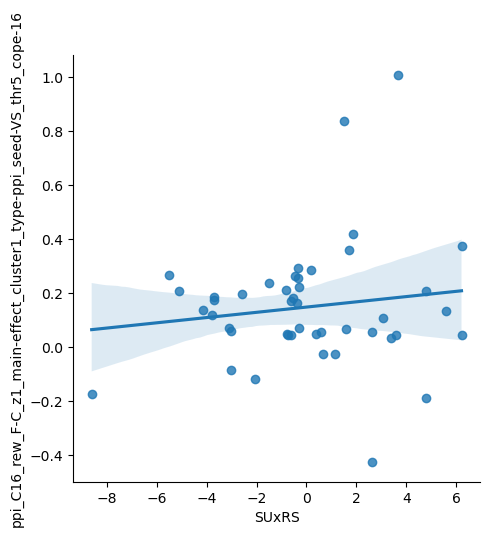

<class 'seaborn.axisgrid.FacetGrid'>


In [39]:
r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['RS'])
print("Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="RS", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SU'])
print("Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SU", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SUxRS'])
print("RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SUxRS", data=df, order=1)
plt.show()
print(type(fig))

Substance Use correlation with VS to aTPJ connectivity when winning vs losing with Friend v Stranger 
r: 0.3549874910006191 ; p: 0.016719144394221473


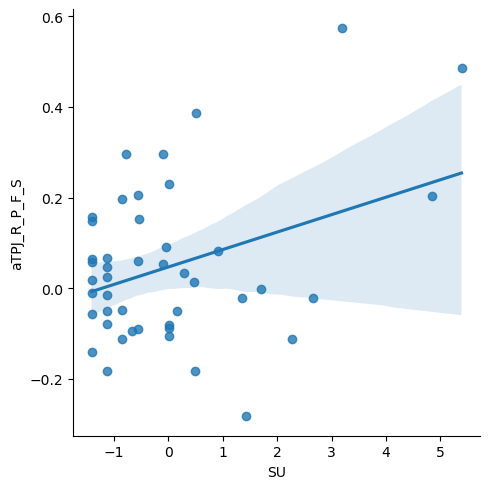

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger 
r: 0.2864204482062377 ; p: 0.05645896676702221


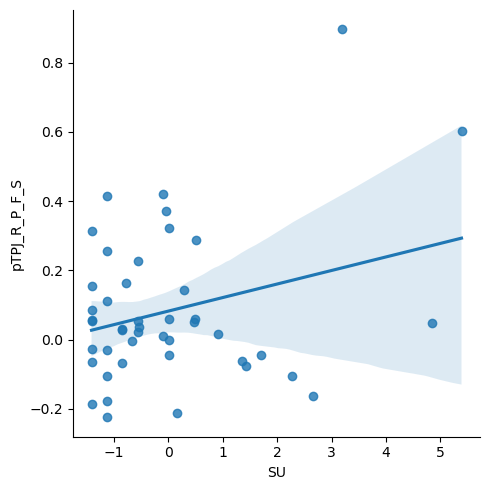

<class 'seaborn.axisgrid.FacetGrid'>


In [40]:
r,p = stats.pearsonr(df['aTPJ_R_P_F_S'], df['SU'])
print("Substance Use correlation with VS to aTPJ connectivity when winning vs losing with Friend v Stranger \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="aTPJ_R_P_F_S",x="SU", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['pTPJ_R_P_F_S'], df['SU'])
print("Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="pTPJ_R_P_F_S",x="SU", data=df, order=1)
plt.show()
print(type(fig))


Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: -0.08156972693500016 ; p: 0.6858686472949822


Difference b/w friend and stranger for: Post-Scan Ratings vs TPJ activation -  r: 0.13854329295082898 ; p: 0.4820056174544579


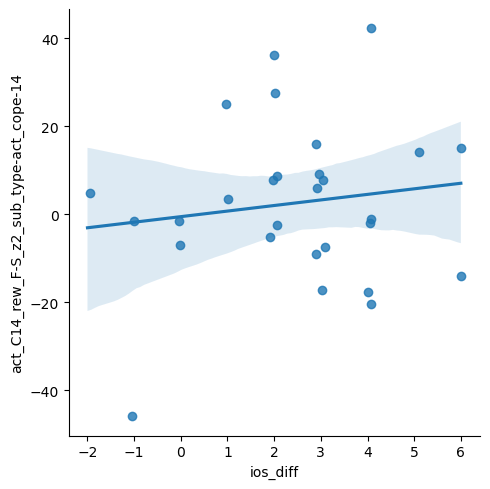

<class 'seaborn.axisgrid.FacetGrid'>


Difference b/w friend and stranger for: Closeness rating vs TPJ activation -  r: 0.2066830712620915 ; p: 0.18358906979908687


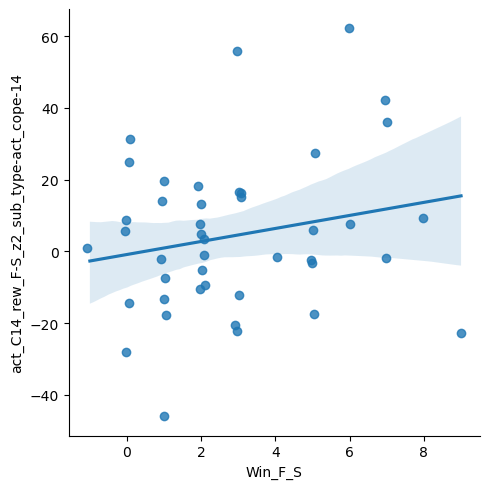

<class 'seaborn.axisgrid.FacetGrid'>


In [41]:
df['ios_diff'] = df['ios_p'] - df['ios_fu_score'] #ios_p was participant rating of frend, ios_fu was participant rating of stranger in follow-up. ios_f was FRIEND rating of participant
df['Win_F_C'] = df['Win-Friend'] - df['Win-Comp']
df['Win_F_S'] = df['Win-Friend'] - df['Win-Stranger']
df_ios = df.dropna(subset=['ios_diff'])
df_psr = df.dropna(subset = ['Win_F_S'])
df_both = df_psr.dropna(subset=['ios_diff'])

r,p = stats.pearsonr(df_both['Win_F_S'], df_both['ios_diff'])
print("Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(df_ios['act_C14_rew_F-S_z2_sub_type-act_cope-14'], df_ios['ios_diff'])
print("\n\nDifference b/w friend and stranger for: Post-Scan Ratings vs TPJ activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='ios_diff',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_ios, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

r,p = stats.pearsonr(df_psr['Win_F_S'], df_psr['act_C14_rew_F-S_z2_sub_type-act_cope-14'])
print("\n\nDifference b/w friend and stranger for: Closeness rating vs TPJ activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='Win_F_S',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_psr, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

In [42]:
os.chdir('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward')
#Make a list of all the SR Files
SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

#Make a list of Dataframes
ratings_list=[]
for f in SR_flist:
    sub=re.search('sub(.*)_',f).group(1)
    if any(i.isdigit() for i in sub):
        tmp_df=pd.read_csv(f)
        tmp_df['sub']=sub
        if len(tmp_df)==6:
            ratings_list.append(tmp_df)
#Concatonate the DataFrames together
srpr_df=pd.concat(ratings_list)
srpr_df=srpr_df.reset_index(drop=True)
#srpr_df['Rating'].astype(float)


#sort by Trait, then Partner
#srpr_df.groupby(by = ['sub','Partner','Trait']).mean()
srpr_df

,TrialNumber,Partner,Trait,ran,order,Rating,sub
0,1,3,0,1.0,0.0,5.0,1001
1,2,2,0,1.0,1.0,-2.0,1001
2,3,1,0,1.0,2.0,5.0,1001
3,4,3,1,1.0,3.0,5.0,1001
4,5,2,1,1.0,4.0,0.0,1001
...,...,...,...,...,...,...,...
271,2,2,0,1.0,1.0,5.0,3218
272,3,1,0,1.0,2.0,5.0,3218
273,4,3,1,1.0,3.0,-5.0,3218
274,5,2,1,1.0,4.0,-5.0,3218


In [43]:

srpr_anova = AnovaRM(srpr_df, 'Rating', 'sub', within=['Partner', 'Trait'])
srpr_results = srpr_anova.fit()

print(srpr_results)

                   Anova
              F Value Num DF  Den DF Pr > F
-------------------------------------------
Partner        5.9129 2.0000 90.0000 0.0039
Trait         87.1510 1.0000 45.0000 0.0000
Partner:Trait 42.7185 2.0000 90.0000 0.0000



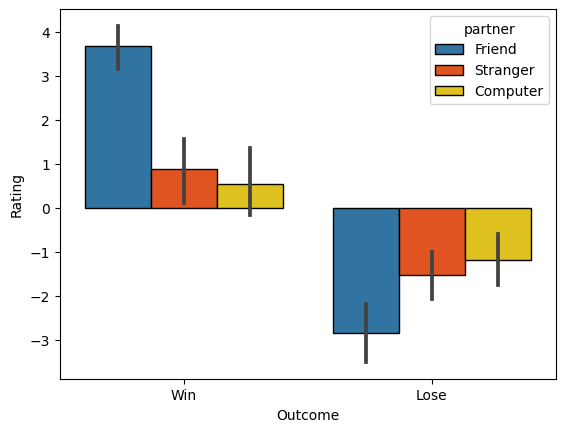

In [46]:
Trait = {0:'Win', 1:'Lose'}
partner = {3:'Friend',2:'Stranger',1:'Computer'}
srpr_df['partner']=srpr_df['Partner'].map(partner)
srpr_df['Outcome']=srpr_df['Trait'].map(Trait)
srpr_df
fig = sns.barplot(y='Rating',x='Outcome',hue='partner', data=srpr_df, palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth = 1)
plt.savefig('../../istart-sharedreward/derivatives/Figures/partner_ratings_anova.svg')
plt.show()

In [47]:
df_psr

,sub,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_fu_score,ios_computer,ios_f,ios_p,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-23,Unnamed: 18,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 26,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,VS_seed_F_S,VS_seed_F_C,win_C,win_F,win_S,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S,aTPJ_R_P_F_C,aTPJ_R_P_F_S,pTPJ_R_P_F_C,pTPJ_R_P_F_S,ios_diff
0,1001,5.0,-2.0,5.0,5.0,0.0,4.0,1.0,1.0,5,5,1001,1,0.479686,-0.622222,-7.936790,-0.637264,2.960326,-0.568018,-0.344076,0.257997,0.375157,0.375157,-0.023776,0.055897,0.043499,0.078306,0.070878,-0.255516,NaN,-8.897129,13.637379,41.681642,42.253260,65.702165,7.122439,7.023092,NaN,-0.124334,-0.129312,-0.011946,-0.156321,-0.057591,-0.019649,-0.015173,-0.410006,-0.080410,-0.212520,-0.012790,-0.204635,40.346370,33.107248,-2.310050,30.797198,-9.549172,4.0,4.0,0.0,7.0,-0.139397,-0.182317,0.262723,0.059736,4.0
1,1006,3.0,2.0,5.0,-4.0,-1.0,-2.0,2.0,2.0,4,5,1006,1,-1.131845,-0.622222,-7.936790,0.365466,2.336405,1.028158,-0.873651,0.297450,0.203178,0.203178,0.148530,-0.553190,0.048455,0.253124,0.390924,0.072858,NaN,30.251268,23.831967,16.998754,-7.474041,-0.526911,5.429469,17.678105,NaN,-0.027773,0.109658,-0.031841,-0.067696,-0.015802,-0.001288,0.100421,0.061524,-0.062508,0.130512,0.014450,0.094393,10.379573,18.905669,-7.936080,10.969588,0.590015,3.0,3.0,-2.0,1.0,-0.173286,-0.050369,0.231917,0.113078,3.0
3,1009,5.0,4.0,4.0,-5.0,-4.0,-4.0,2.0,1.0,5,6,1009,1,-1.131845,0.377778,-8.181235,-0.766379,2.613079,1.370494,-0.301386,0.042417,0.182616,0.182616,0.239714,-0.081801,0.050043,0.040188,0.026646,0.490375,NaN,6.595074,-9.533180,15.810334,-17.603033,-29.907103,-9.650790,16.099039,NaN,-0.104572,0.070416,0.049526,0.185446,0.097494,0.207775,-0.199587,0.108495,-0.064522,-0.003135,-0.154966,0.083374,38.766866,58.052598,-27.829507,30.223091,-8.543776,5.0,4.0,1.0,1.0,-0.039068,0.025640,-0.246696,-0.176953,4.0
4,1010,1.0,-2.0,-5.0,2.0,-3.0,-5.0,NaN,NaN,6,6,1010,1,3.190376,-1.622222,-5.692346,-5.514293,11.170422,-0.991437,0.558449,-0.320931,-0.771705,-0.771705,0.365152,0.310482,0.266391,0.314331,0.787606,0.549525,NaN,17.901311,5.852669,-0.372075,55.805235,50.540134,6.244366,38.020551,NaN,-0.013869,-0.257590,-0.403182,-0.025067,-0.155147,-0.350274,-0.120598,-0.173152,-0.481878,0.118195,-0.100709,-0.396719,36.984804,21.223241,5.707777,26.931018,-10.053786,NaN,NaN,6.0,3.0,0.621836,0.573241,0.652627,0.896084,NaN
5,1011,5.0,5.0,2.0,-5.0,-5.0,-5.0,NaN,NaN,7,5,1011,1,-1.416233,2.377778,-2.670123,-3.706279,-5.232523,-1.678332,1.498732,0.145049,0.365831,0.365831,0.092184,0.100279,0.175593,0.219936,0.189737,0.867485,NaN,2.925382,-3.930550,-49.534258,-28.170113,-91.601465,-36.733455,-4.753485,NaN,0.108296,0.070321,-0.022086,0.151899,-0.113821,-0.087979,0.013179,0.109955,-0.047087,0.126304,-0.153662,-0.136274,-75.332588,-22.950430,42.914065,19.963635,95.296223,NaN,Na

In [48]:
ratings_lm = ols("Win_F_C ~ ios_diff_computer + SU + RS + SU:RS", data=df_psr).fit()

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_F_C   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.365
Date:                Wed, 25 Jan 2023   Prob (F-statistic):              0.278
Time:                        13:48:21   Log-Likelihood:                -64.818
No. Observations:                  27   AIC:                             139.6
Df Residuals:                      22   BIC:                             146.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3025      1.061      2.170      0.041       0.102       4.503
ios_diff_computer     0.0966      0.324      0.298      0.768      -0.575       0.769
SU                   -0.6070      0.696     -0.872      0.393      -2.051       0.837
RS                    0.5488      0.239      2.300      0.031       0.054       1.044
SU:RS                 0.1767      0.219      0.806      0.429      -0.278       0.631
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.888
Skew:                           0.301   Prob(JB):                        0.641
Kurtosis:                       2.347   Cond. No.                         7.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
iosxSU = df_psr.ios_diff_stranger * df_psr.SU
df['Values'] = iosxSU

iosxRS = df_psr.ios_diff_stranger * df_psr.RS
df_psr['iosxRS'] = iosxRS

iosxRS_square = df_psr.ios_diff_stranger * df_psr.RS_square
df_psr['iosxRS_square'] = iosxRS_square


ratings_lm = ols("pTPJ_R_P_F_S ~ ios_diff_stranger + SU + RS + RS_square + iosxSU + iosxRS + iosxRS_square + SUxRS + SUxRS_sq + tsnr + fd_mean", data=df_psr).fit()

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()

C:\Users\tup54227\AppData\Local\Temp\ipykernel_9244\260998454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psr['iosxRS'] = iosxRS
C:\Users\tup54227\AppData\Local\Temp\ipykernel_9244\260998454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psr['iosxRS_square'] = iosxRS_square


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pTPJ_R_P_F_S   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.9586
Date:                Wed, 25 Jan 2023   Prob (F-statistic):              0.518
Time:                        14:45:46   Log-Likelihood:                 16.976
No. Observations:                  27   AIC:                            -9.951
Df Residuals:                      15   BIC:                             5.599
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1249      0.083      1.509      0.152      -0.052       0.301
ios_diff_stranger    -0.0237      0.024     -1.002      0.332      -0.074       0.027
SU                    0.1287      0.110      1.171      0.260      -0.105       0.363
RS                    0.0040      0.047      0.085      0.934      -0.096       0.104
RS_square            -0.0133      0.014     -0.943      0.360      -0.043       0.017
iosxSU               -0.0053      0.030     -0.178      0.861      -0.069       0.058
iosxRS                0.0160      0.010      1.581      0.135      -0.006       0.038
iosxRS_square      8.095e-05      0.003      0.026      0.980      -0.007       0.007
SUxRS                 0.0415      0.026      1.611      0.128      -0.013       0.096
SUxRS_sq             -0.0160      0.010     -1.628      0.124      -0.037       0.005
tsnr                  0.0895      0.056      1.607      0.129      -0.029       0.208
fd_mean               0.0685      0.045      1.511      0.152      -0.028       0.165
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.236
Skew:                           0.222   Prob(JB):                        0.889
Kurtosis:                       2.892   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
df_TPJ = df[['sub','aTPJ_R_P_F_C', 'aTPJ_R_P_F_S','pTPJ_R_P_F_C','pTPJ_R_P_F_S']].copy()
df
#len(df_TPJ)
df_TPJ.to_excel('../../istart-sharedreward/derivatives/df_TPJ.xlsx', index = False)

In [55]:
len(df_TPJ)

45